## Exercise 1

The [Pima Indians dataset](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) is a very famous dataset distributed by UCI and originally collected from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains data from clinical exams for women age 21 and above of Pima indian origins. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

It has the following features:

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)

The last colum is the outcome, and it is a binary variable.

In this first exercise we will explore it through the following steps:

1. Load the ..data/diabetes.csv dataset, use pandas to explore the range of each feature
- For each feature draw a histogram. Bonus points if you draw all the histograms in the same figure.
- Explore correlations of features with the outcome column. You can do this in several ways, for example using the `sns.pairplot` we used above or drawing a heatmap of the correlations.
- Do features need standardization? If so what stardardization technique will you use? MinMax? Standard?
- Prepare your final `X` and `y` variables to be used by a ML model. Make sure you define your target variable well. Will you need dummy columns?

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data loading and feature exploration

In [5]:
#Load the dataset and create dataframe

data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Visualization of the features with histogram

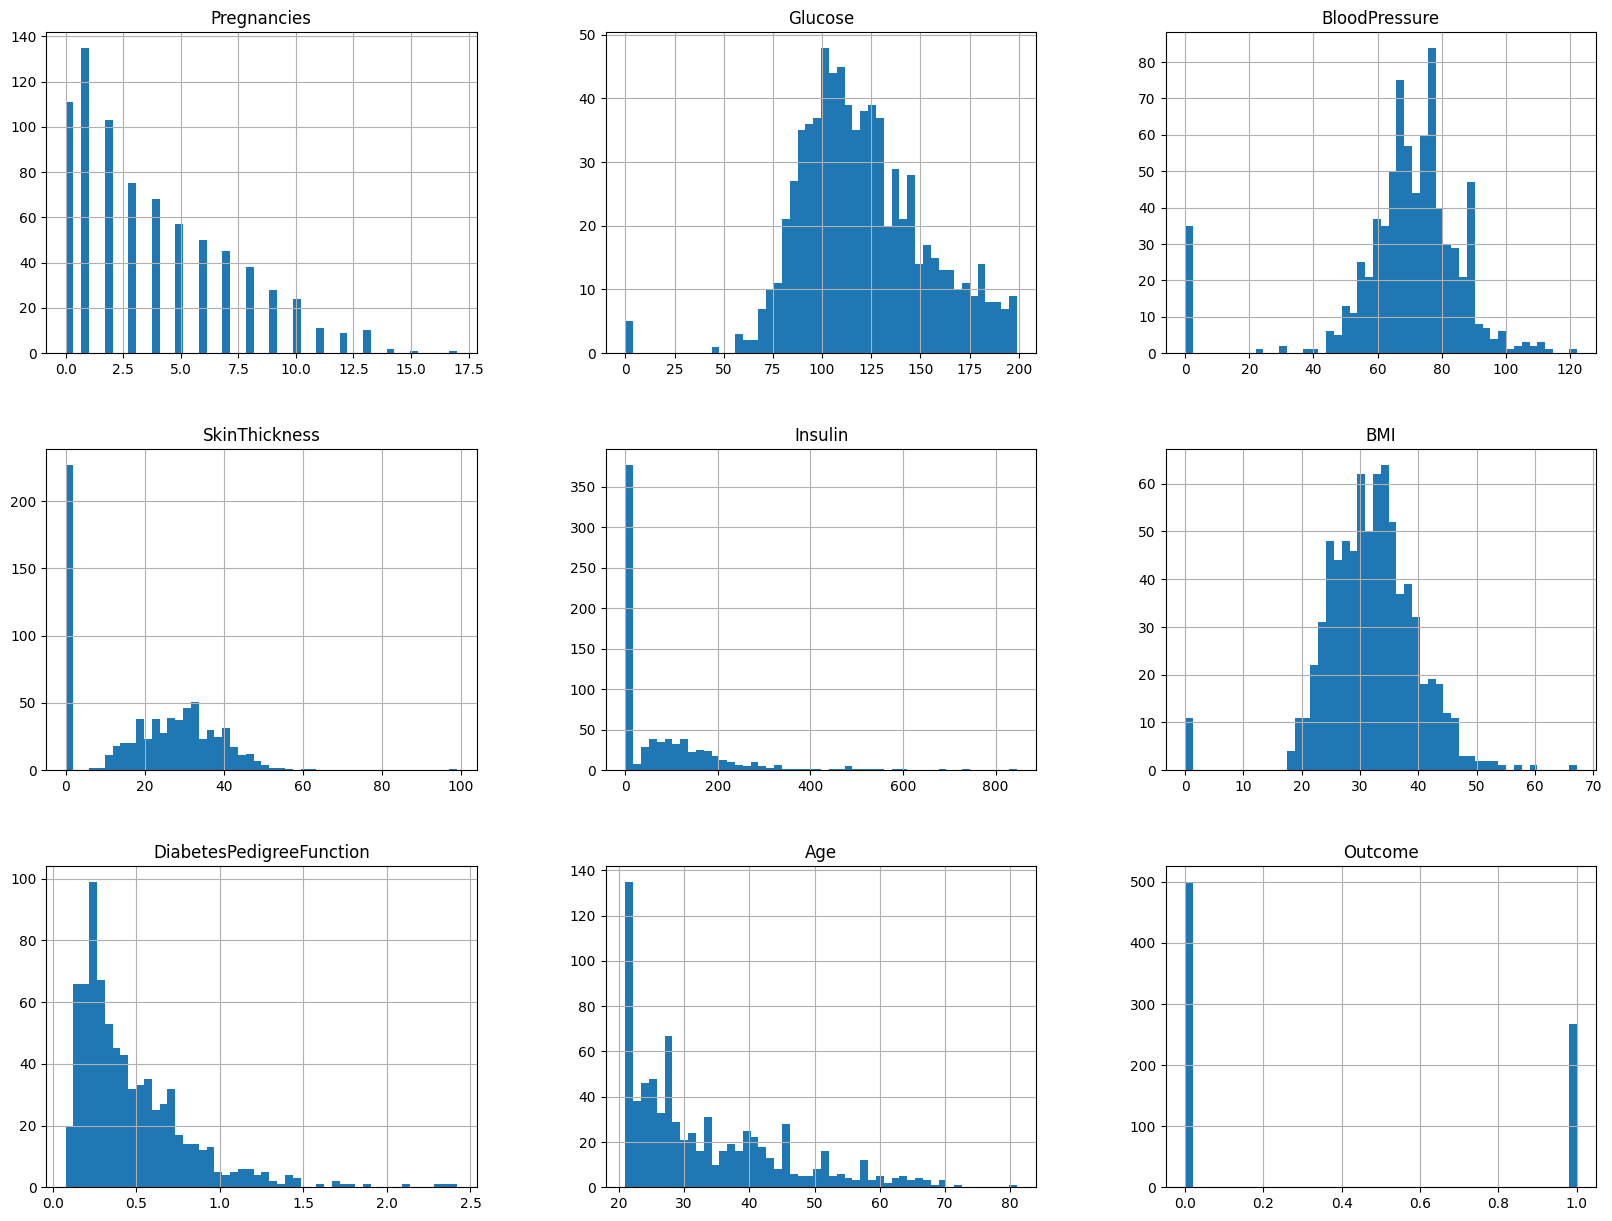

In [8]:
%matplotlib inline

data.hist(bins=50, figsize=(20,15))
plt.show()

### Looking into correlations

In [9]:
corr_matrix = data.corr()

#wrt the target value
corr_matrix["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

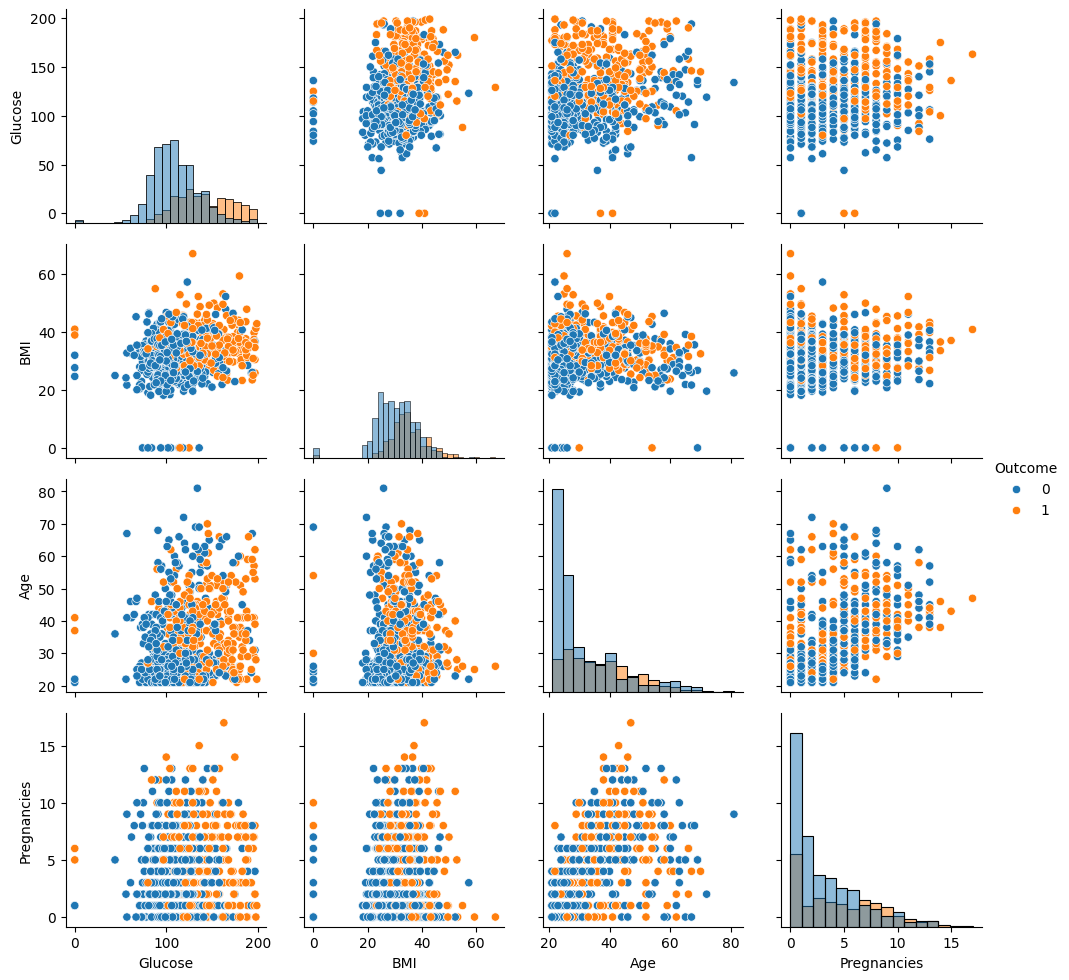

In [10]:
# correlation graphs
from seaborn import histplot, scatterplot, PairGrid
g = PairGrid(data, vars= ["Glucose", "BMI", "Age", "Pregnancies"], hue="Outcome")
g.map_diag(histplot)
g.map_offdiag(scatterplot)
g.add_legend()

### Feature Scaling

For the various range of dataset, scaling might produce better understanding. In this dataset, the mean of each features vary greatly from eachother, standardization seems appropiate

In [11]:
from sklearn.preprocessing import StandardScaler
data_copy = data.copy()
scaler = StandardScaler()
print(scaler.fit(data_copy))

StandardScaler()


In [12]:
scaler.transform(data)

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.23388019,  1.94372388, -0.26394125, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.47378505,
        -0.87137393, -0.73212021]])

### Model selection and implementation

In [13]:
from sklearn.model_selection import train_test_split

x = data.drop(labels="Outcome", axis=1)
y = data["Outcome"]

x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=.2, random_state=33)

In [130]:
#final model

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=3, class_weight={})
clf.fit(x_train, y_train)


c:\Users\SRTU\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={}, random_state=3)

In [131]:
y_pred = clf.predict(x_test)

In [132]:
#evaluation

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.93      0.83       100
           1       0.77      0.44      0.56        54

    accuracy                           0.76       154
   macro avg       0.77      0.69      0.70       154
weighted avg       0.76      0.76      0.74       154



In [133]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(y_test, y_pred)

array([[93,  7],
       [30, 24]], dtype=int64)

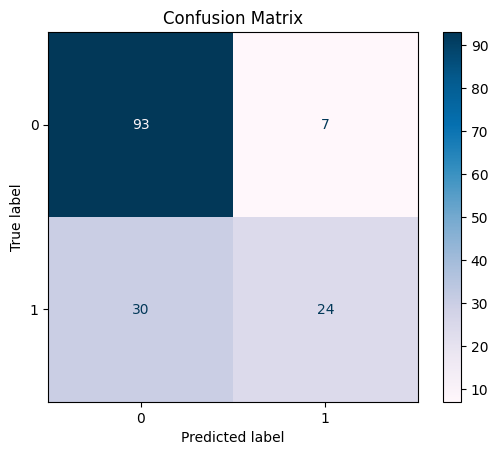

In [134]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.PuBu)
plt.title('Confusion Matrix')
plt.show()

## Excercise 2

Build a fully connected NN model that predicts diabetes. Follow these steps:

1. Split your data in a train/test with a test size of 20% and a `random_state = 22`
- define a sequential model with at least one inner layer. You will have to make choices for the following things:
    - what is the size of the input?
    - how many nodes will you use in each layer?
    - what is the size of the output?
    - what activation functions will you use in the inner layers?
    - what activation function will you use at output?
    - what loss function will you use?
    - what optimizer will you use?
- fit your model on the training set, using a validation_split of 0.1
- test your trained model on the test data from the train/test split
- check the accuracy score, the confusion matrix and the classification report

In [150]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [151]:
x = data.drop(labels="Outcome", axis=1)
y = data["Outcome"].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=22)

In [152]:
from tensorflow import keras
from keras.src.layers import Dense, BatchNormalization
from keras.src.optimizers import adam

model = keras.models.Sequential(
    [
        keras.layers.Input(shape=(8,)),  #each batch of the input will have 8 features
        Dense(units=400, activation="relu"),
        BatchNormalization(),
        Dense(units=300, activation="relu"),
        Dense(units=200, activation="relu"),
        Dense(units=100, activation="relu"),
        Dense(units=1, activation="sigmoid")  #size of the output is 1 unit; loss function "sigmoid" because 1 unit as output
    ]
)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]) #adam as it is one of the best for classification problem

In [148]:
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_97 (Dense)                │ (None, 400)            │         3,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 400)            │         1,600 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 300)            │       120,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 205,901 (804.30 KB)

 Trainable params: 205,101 (801.18 KB)

 Non-trainable params: 800 (3.12 KB)

In [153]:
model.fit(x_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6477 - loss: 0.6324
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7388 - loss: 0.5268
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7871 - loss: 0.4474
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7729 - loss: 0.4835
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7752 - loss: 0.4576
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7672 - loss: 0.4636 
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8086 - loss: 0.4185
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8146 - loss: 0.4146
Epoch 9/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8145 - loss: 0.4074
Epoch 10/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7846 - loss: 0.4504
Epoch 11/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7901 - loss: 0.4336
Epoch 12/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7724 - l

In [154]:
y_prb = model.predict(x_test)
y_pred = (y_prb > 0.5).astype(int)

#the accuracy

results = model.evaluate(x_test, y_test)
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7906 - loss: 0.4923
The Accuracy score on the Train set is:	0.766


In [155]:
### Evaluation

report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.79      0.88      0.83       100
           1       0.71      0.56      0.62        54

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



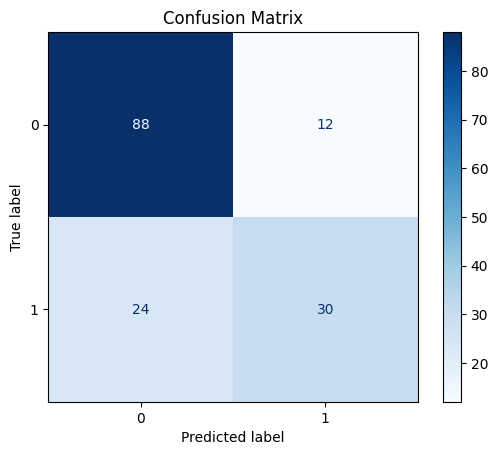

In [156]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Excercise 3

Compare your work with the results presented in [this notebook](https://www.kaggle.com/futurist/d/uciml/pima-indians-diabetes-database/pima-data-visualisation-and-machine-learning). Are your Neural Network results better or worse than the results obtained by traditional Machine Learning techniques?

- Try training a Support Vector Machine or a Random Forest model on the exact same train/test split. Is the performance better or worse?
- Try restricting your features to only 4 features like in the suggested notebook. How does model performance change?

### Restricting to 4 features

In [157]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [158]:
x = data[["Glucose", "BMI", "Age","Pregnancies"]]
y = data["Outcome"].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=22)

In [159]:
model = keras.models.Sequential(
    [
        keras.layers.Input(shape=(4,)),  #each batch of the input will have 4 features
        Dense(units=400, activation="relu"),
        BatchNormalization(),
        Dense(units=300, activation="relu"),
        Dense(units=100, activation="relu"),
        Dense(units=1, activation="sigmoid")  #size of the output is 1 unit; loss function "sigmoid" because 1 unit as output
    ]
)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]) #adam as it is one of the best for classification problem

In [160]:
model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_107 (Dense)               │ (None, 400)            │         2,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 400)            │         1,600 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 300)            │       120,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 154,101 (601.96 KB)

 Trainable params: 153,301 (598.83 KB)

 Non-trainable params: 800 (3.12 KB)

In [161]:
model.fit(x_train, y_train, epochs=30, batch_size=32)

y_prb = model.predict(x_test)
y_pred = (y_prb > 0.5).astype(int)

results = model.evaluate(x_test, y_test)
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7380 - loss: 0.5959
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7628 - loss: 0.4717 
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8008 - loss: 0.4626 
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7832 - loss: 0.4450
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7448 - loss: 0.5056
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7613 - loss: 0.4775
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7798 - loss: 0.4455
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7817 - loss: 0.4756
Epoch 9/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7682 - loss: 0.4624
Epoch 10/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7895 - loss: 0.4518
Epoch 11/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7885 - loss: 0.4317
Epoch 12/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8127 - 

In [162]:
### Evaluation

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       100
           1       0.74      0.52      0.61        54

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.75       154



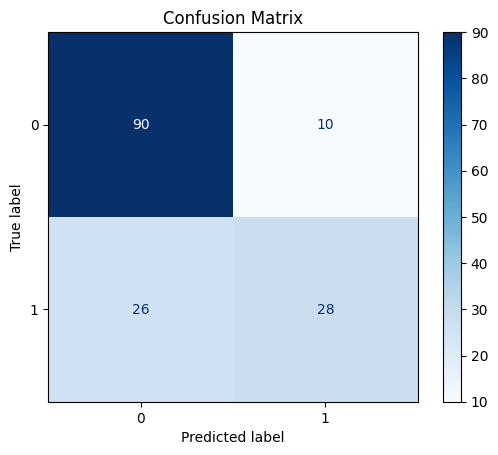

In [163]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()